# Task 1:
### Titanic Survival Prediction:

In [34]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [35]:
# Loading the Dataset

data = pd.read_csv(r'F:\CodSoft\TitanicSurvivalPrediction\Titanic-Dataset.csv')

In [36]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
# Handling Missing Values:

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])

In [40]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
print('\nMissing Values after handling:', data.isnull().sum())


Missing Values after handling: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


C:\Users\AbasheshR\AppData\Local\Temp\ipykernel_10148\3232279292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [41]:
# Feature Scaling:

# Creating a new feature called family size:

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Drop less informative features
data.drop(['SibSp', 'Parch', 'Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [42]:
# Encode Categorical Variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [43]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,1,22.0,7.2500,2,2
1,2,1,1,0,38.0,71.2833,0,2
2,3,1,3,0,26.0,7.9250,2,1
3,4,1,1,0,35.0,53.1000,2,2
4,5,0,3,1,35.0,8.0500,2,1


In [44]:
# Feature Scaling
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [45]:
# Feature Selection

selected_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
X = data[selected_features]
y = data['Survived']

In [46]:
# Train-Test Split:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [47]:
# Step 8: Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_model = grid_search.best_estimator_
print('\nBest Parameters:', grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [48]:
# Model Evaluation:

y_pred = best_model.predict(X_test)
print('\n Accuracy:', accuracy_score(y_test, y_pred))


 Accuracy: 0.8324022346368715


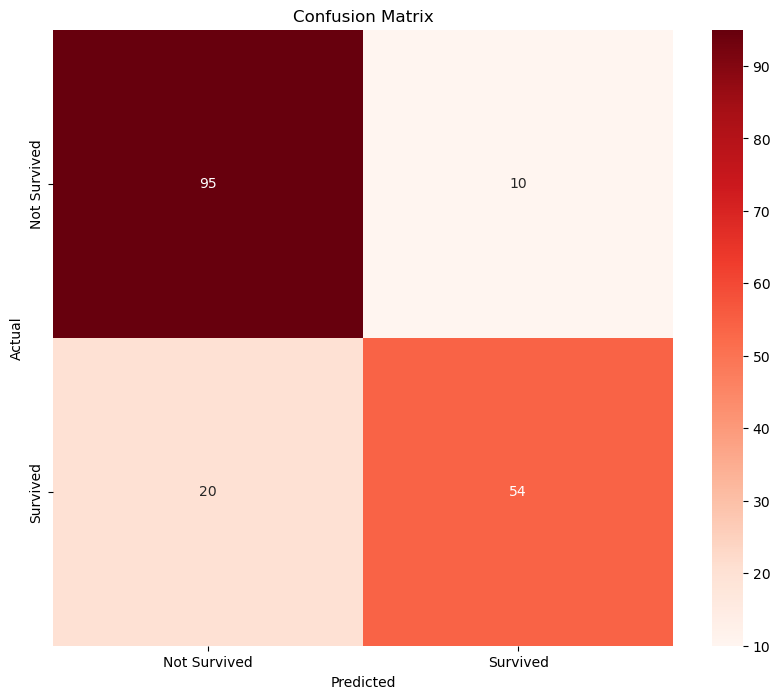


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [49]:
# Confusion Matrix:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\nClassification Report:\n', classification_report(y_test, y_pred))

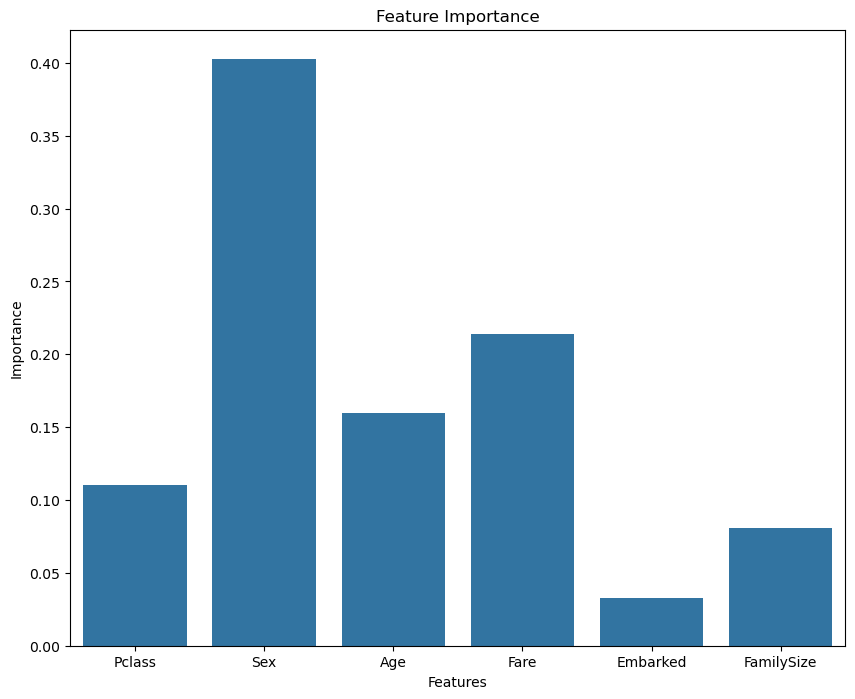

In [50]:
# Important Features:

feature_imp = best_model.feature_importances_
plt.figure(figsize=(10,8))
sns.barplot(x = selected_features, y = feature_imp)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [51]:
# Save the Model:

joblib.dump(best_model, 'titanic_model.plk')

['titanic_model.plk']

In [52]:
# Predicting the Survival:

def predict_survival():
    print('\nEnter passenger details to predict survival:')
    Pclass = int(input('Enter the Passenger Class (1-Upper, 2-Middle, 3-Lower):'))
    Sex = input('Enter Sex (male/female):').strip().lower()
    Age = float(input('Enter Age:'))
    Fare = float(input('Enter Fare:'))
    Embarked = input('Enter Embarked Port (C-Cherbourg, Q-Queenstown, S-Southampton):').strip().upper()
    FamilySize = int(input('Enter Family Size (including self):'))

    # Encode inputs
    Sex = 1 if Sex == 'male' else 0
    Embarked = {'C': 0, 'Q': 1, 'S': 2}.get(Embarked, 2)  # Default to 'S' if invalid

    # Scale numerical inputs
    scaled_values = scaler.transform([[Age, Fare]])
    Age, Fare = scaled_values[0][0], scaled_values[0][1]

    # Create input array
    user_input = np.array([[Pclass, Sex, Age, Fare, Embarked, FamilySize]])

    # Predict survival
    prediction = best_model.predict(user_input)
    result = 'Survived' if prediction[0] == 1 else 'Not Survived'
    print(f'\nPrediction: The passenger would have {result}.')

# Calling the prediction function
predict_survival()


Enter passenger details to predict survival:

Prediction: The passenger would have Survived.


c:\Users\AbasheshR\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\AbasheshR\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
